In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers

In [ ]:
train_dir = '/content/drive/MyDrive/train'
validation_dir = '/content/drive/MyDrive/valid'

In [ ]:
import os


train_dir = r'/content/drive/MyDrive/train'


folder_names = [folder for folder in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, folder))]


print(folder_names)


['Soybean___healthy', 'Potato___Late_blight', 'Potato___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Potato___Early_blight', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot']


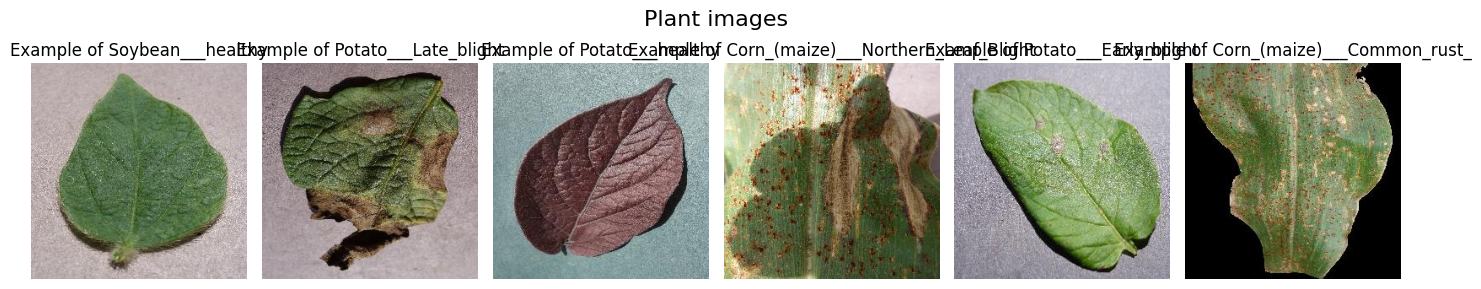

In [ ]:
train_dir = r'/content/drive/MyDrive/train'


fig, axes = plt.subplots(1, 6, figsize=(14, 3))
fig.suptitle('Plant images', fontsize=16)


for ii, plant in enumerate(folder_names[:6]):
    folder_path = os.path.join(train_dir, plant)


    img_path = os.path.join(folder_path, os.listdir(folder_path)[0])
    img = tf.keras.preprocessing.image.load_img(img_path)


    axes[ii].imshow(img)
    axes[ii].set_title(f'Example of {plant}')
    axes[ii].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
sample_array = tf.keras.preprocessing.image.img_to_array(img)

print(f"Each image has shape: {sample_array.shape}")

Each image has shape: (256, 256, 3)


In [ ]:
sample_array[0,:5]

array([[0., 3., 0.],
       [0., 3., 0.],
       [0., 4., 0.],
       [0., 4., 0.],
       [0., 4., 0.]], dtype=float32)

In [ ]:
def train_val_datasets():
    """Create train and validation datasets

    Returns:
        (tf.data.Dataset, tf.data.Dataset): train and validation datasets
    """
    ### START CODE HERE ###
    train_dataset = tf.keras.utils.image_dataset_from_directory(
        directory=train_dir,
        batch_size=32,
        image_size=(256,256),
        label_mode="categorical",
        shuffle=True,
        interpolation="bilinear",
    )
    validation_dataset = tf.keras.utils.image_dataset_from_directory(
        directory=validation_dir,
        batch_size=32,
        image_size=(256,256),
        label_mode="categorical",
        shuffle=True,
        interpolation="bilinear",
    )

    # Extract class names from the train dataset
    class_labels = {index: label for index, label in enumerate(train_dataset.class_names)}
    ### END CODE HERE ###

    return train_dataset, validation_dataset, class_labels


In [ ]:
train_dataset, validation_dataset,class_labels = train_val_datasets()
print(f"Images of train dataset have shape: {train_dataset.element_spec[0].shape}")
print(f"Labels of train dataset have shape: {train_dataset.element_spec[1].shape}")
print(f"Images of validation dataset have shape: {validation_dataset.element_spec[0].shape}")
print(f"Labels of validation dataset have shape: {validation_dataset.element_spec[1].shape}")

Found 15064 files belonging to 8 classes.
Found 15060 files belonging to 8 classes.
Images of train dataset have shape: (None, 256, 256, 3)
Labels of train dataset have shape: (None, 8)
Images of validation dataset have shape: (None, 256, 256, 3)
Labels of validation dataset have shape: (None, 8)


In [ ]:
print(class_labels)

{0: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 1: 'Corn_(maize)___Common_rust_', 2: 'Corn_(maize)___Northern_Leaf_Blight', 3: 'Corn_(maize)___healthy', 4: 'Potato___Early_blight', 5: 'Potato___Late_blight', 6: 'Potato___healthy', 7: 'Soybean___healthy'}


In [ ]:
def create_model():
    """Create the classifier model for multi-class classification.

    Returns:
        tf.keras.models.Sequential: CNN model
    """
    model = tf.keras.models.Sequential([

        tf.keras.layers.Input(shape=(256, 256, 3)),
        tf.keras.layers.Rescaling(1./255),
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(8, activation='softmax')  # Output for 8 classes
    ])


    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


In [ ]:
model = create_model()

In [ ]:
print(f'Input shape: {model.input_shape}')
print(f'Output shape: {model.output_shape}')

Input shape: (None, 256, 256, 3)
Output shape: (None, 8)


In [ ]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_11 (Rescaling)             │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 8)                   │           1,032 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,840,008 (56.61 MB)

 Trainable params: 14,840,008 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
for images, labels in train_dataset.take(1):
	example_batch_images = images
	example_batch_labels = labels

try:
	model.evaluate(example_batch_images, example_batch_labels, verbose=False)
except:
	print("Your model is not compatible with the dataset you defined earlier. Check that the loss function, last layer and label_mode are compatible with one another.")
else:
	predictions = model.predict(example_batch_images, verbose=False)
	print(f"predictions have shape: {predictions.shape}")

predictions have shape: (32, 8)


In [ ]:
history = model.fit(train_dataset,
                    epochs=15,
                    validation_data=validation_dataset,
                    )

Epoch 1/15
471/471 ━━━━━━━━━━━━━━━━━━━━ 50s 98ms/step - accuracy: 0.4949 - loss: 1.3665 - val_accuracy: 0.8811 - val_loss: 0.3762
Epoch 2/15
471/471 ━━━━━━━━━━━━━━━━━━━━ 41s 86ms/step - accuracy: 0.7918 - loss: 0.5817 - val_accuracy: 0.9210 - val_loss: 0.2516
Epoch 3/15
471/471 ━━━━━━━━━━━━━━━━━━━━ 41s 87ms/step - accuracy: 0.8631 - loss: 0.3894 - val_accuracy: 0.9422 - val_loss: 0.1696
Epoch 4/15
471/471 ━━━━━━━━━━━━━━━━━━━━ 40s 85ms/step - accuracy: 0.8883 - loss: 0.3168 - val_accuracy: 0.9651 - val_loss: 0.1113
Epoch 5/15
471/471 ━━━━━━━━━━━━━━━━━━━━ 40s 85ms/step - accuracy: 0.9072 - loss: 0.2611 - val_accuracy: 0.9743 - val_loss: 0.0873
Epoch 6/15
471/471 ━━━━━━━━━━━━━━━━━━━━ 40s 86ms/step - accuracy: 0.9183 - loss: 0.2296 - val_accuracy: 0.9740 - val_loss: 0.0727
Epoch 7/15
471/471 ━━━━━━━━━━━━━━━━━━━━ 40s 85ms/step - accuracy: 0.9219 - loss: 0.2071 - val_accuracy: 0.9792 - val_loss: 0.0634
Epoch 8/15
471/471 ━━━━━━━━━━━━━━━━━━━━ 41s 87ms/step - accuracy: 0.9319 - loss: 0.1891 - 

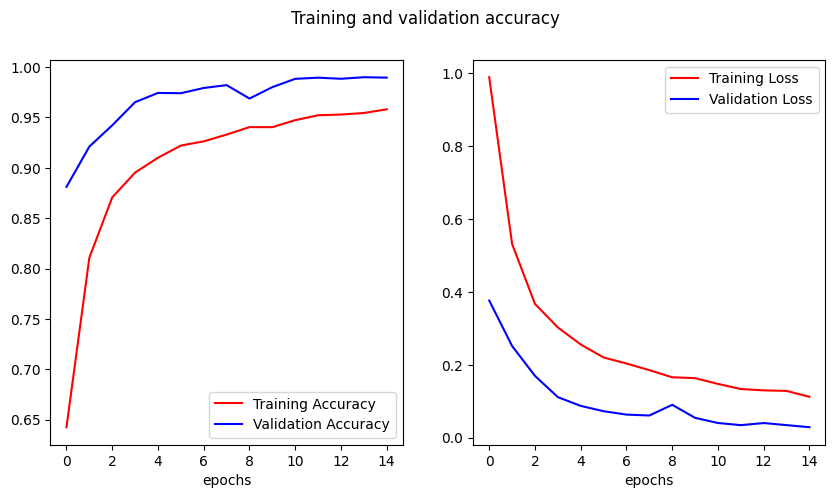

In [ ]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Training and validation accuracy')

for i, (data, label) in enumerate(zip([(acc, val_acc), (loss, val_loss)], ["Accuracy", "Loss"])):
    ax[i].plot(epochs, data[0], 'r', label="Training " + label)
    ax[i].plot(epochs, data[1], 'b', label="Validation " + label)
    ax[i].legend()
    ax[i].set_xlabel('epochs')

plt.show()

In [ ]:
import os
import tensorflow as tf


base_directory = "/content/savedmodels"


os.makedirs(base_directory, exist_ok=True)


for version in range(1, 4):

    model = create_model()
    version_path = os.path.join(base_directory, str(version))


    tf.saved_model.save(model, version_path)

    print(f"Model version {version} saved at: {version_path}")


Model version 1 saved at: /content/savedmodels/1
Model version 2 saved at: /content/savedmodels/2
Model version 3 saved at: /content/savedmodels/3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model saved in folder: /content/Models/1


In [ ]:
import shutil
from google.colab import files


shutil.make_archive("/content/savedmodels", 'zip', base_directory)


files.download("/content/savedmodels.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model.save("savedmodels.h5")